# rf_predict.ipynb

## Notebook Purpose
This notebook is designed to use the trained Random Forest model to predict future cryptocurrency prices. It will load the trained model, apply it to the test data, and generate future predictions. The notebook will also visualize the predictions and compare them with the actual values.

## Instructions

### Import Necessary Libraries:
- Import `pandas` for data manipulation.
- Import `joblib` to load the trained model.
- Import `matplotlib` for data visualization.

### Load Preprocessed Data and Model:
- Load the preprocessed CSV file created in the data preparation notebook.
- Load the trained Random Forest model from the model generation notebook.

### Generate Predictions:
- Use the Random Forest model to predict future prices.
- Apply the model to the test data to predict prices.

### Visualize Predictions:
- Generate a plot to compare the predicted prices with the actual closing prices.

### Save Predictions:
- Save the generated predictions to a new CSV file for future reference.

## Example Code
```python
# Import necessary libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load preprocessed data and model
data_path = 'data/cleaned_data/BTC_cleaned.csv'  # Update this path based on the selected cryptocurrency
data = pd.read_csv(data_path, parse_dates=['Date'], index_col='Date')
model_path = 'models/BTC_random_forest_model.pkl'
model = joblib.load(model_path)

# Prepare data for prediction
X_test = data[['Open', 'High', 'Low', 'Close', 'Volume']].tail(30)

# Make predictions
predictions = model.predict(X_test)

# Save predictions
results = X_test.copy()
results['Predictions'] = predictions
results.to_csv('results/BTC_rf_predictions.csv')

# Display predictions
results.head()

# Plot predictions vs actual prices
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Close'], label='Actual Price')
plt.plot(results.index, results['Predictions'], label='Predicted Price', linestyle='--')
plt.title('Random Forest Model Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt


In [2]:
# Cell 2: Define global variables
global crypto_data
global crypto_models


In [4]:
# Cell 3: Load preprocessed data and models
data_paths = {
    'BTC': '../data/cleaned_data/BTC_cleaned.csv',
    'ETH': '../data/cleaned_data/ETH_cleaned.csv',
    'SOL': '../data/cleaned_data/SOL_cleaned.csv'
}

model_paths = {
    'BTC': '../models/BTC_random_forest_model.pkl',
    'ETH': '../models/ETH_random_forest_model.pkl',
    'SOL': '../models/SOL_random_forest_model.pkl'
}

crypto_data = {}
crypto_models = {}

try:
    for crypto in data_paths.keys():
        crypto_data[crypto] = pd.read_csv(data_paths[crypto], parse_dates=['Date'], index_col='Date')
        crypto_models[crypto] = joblib.load(model_paths[crypto])
        print(f"{crypto} data and model loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading data or model: {e}")


BTC data and model loaded successfully.
ETH data and model loaded successfully.
SOL data and model loaded successfully.


In [7]:
# Cell 4: Create lagged features
def create_lagged_features(data, num_lags=7):
    df = data.copy()
    for i in range(1, num_lags + 1):
        df[f'Close_Lag{i}'] = df['Close'].shift(i)
    df = df.dropna()
    return df

crypto_data_lagged = {crypto: create_lagged_features(data) for crypto, data in crypto_data.items()}

# Verify lagged data
for crypto, data in crypto_data_lagged.items():
    print(f"\n{crypto} lagged data:")
    print(data.head())



BTC lagged data:
             Open   High    Low  Close      Volume  Close_Lag1  Close_Lag2  \
Date                                                                         
2013-07-17  97.10  100.0  96.18  98.50  1642097.60       97.10       98.89   
2013-07-18  98.50   98.8  86.20  90.07  5358091.05       98.50       97.10   
2013-07-19  90.07   95.2  87.60  92.09  2474448.15       90.07       98.50   
2013-07-20  92.09   93.1  89.27  89.82   829452.96       92.09       90.07   
2013-07-21  89.82   92.0  88.00  92.00   769333.68       89.82       92.09   

            Close_Lag3  Close_Lag4  Close_Lag5  Close_Lag6  Close_Lag7  
Date                                                                    
2013-07-17       94.42       98.32       93.99       88.98       88.00  
2013-07-18       98.89       94.42       98.32       93.99       88.98  
2013-07-19       97.10       98.89       94.42       98.32       93.99  
2013-07-20       98.50       97.10       98.89       94.42       98.32

In [8]:
# Cell 5: Prepare data for prediction
def prepare_data(data, num_lags=7, days=30):
    data = data.tail(days + num_lags)
    X_test = data[[f'Close_Lag{i}' for i in range(1, num_lags + 1)]].tail(days)
    return X_test

crypto_X_test = {crypto: prepare_data(data) for crypto, data in crypto_data_lagged.items()}

# Verify prepared data
for crypto, X_test in crypto_X_test.items():
    print(f"\n{crypto} X_test:")
    print(X_test.head())



BTC X_test:
              Close_Lag1    Close_Lag2    Close_Lag3    Close_Lag4  \
Date                                                                 
2024-06-13  69647.992188  69647.992188  69647.992188  69647.992188   
2024-06-14  66756.398438  69647.992188  69647.992188  69647.992188   
2024-06-15  66756.398438  66756.398438  69647.992188  69647.992188   
2024-06-16  66756.398438  66756.398438  66756.398438  69647.992188   
2024-06-17  66639.046875  66756.398438  66756.398438  66756.398438   

              Close_Lag5    Close_Lag6    Close_Lag7  
Date                                                  
2024-06-13  71082.820313  71082.820313  71082.820313  
2024-06-14  69647.992188  71082.820313  71082.820313  
2024-06-15  69647.992188  69647.992188  71082.820313  
2024-06-16  69647.992188  69647.992188  69647.992188  
2024-06-17  69647.992188  69647.992188  69647.992188  

ETH X_test:
             Close_Lag1   Close_Lag2   Close_Lag3   Close_Lag4   Close_Lag5  \
Date               

In [9]:
# Cell 6: Generate predictions
crypto_predictions = {}
for crypto in crypto_models.keys():
    print(f"Generating predictions for {crypto}")
    model = crypto_models[crypto]
    X_test = crypto_X_test[crypto]
    predictions = model.predict(X_test)
    crypto_predictions[crypto] = predictions

# Verify generated predictions
for crypto, predictions in crypto_predictions.items():
    print(f"\n{crypto} predictions:")
    print(predictions[:5])


Generating predictions for BTC
Generating predictions for ETH
Generating predictions for SOL

BTC predictions:
[69037.95906282 67455.37288128 67287.86733441 67503.8102641
 67485.25651254]

ETH predictions:
[3752.36016492 3745.28707704 3718.32773466 3744.74569755 3841.26992447]

SOL predictions:
[157.55583021 156.28245124 156.73050356 173.17414974 177.69097325]


In [10]:
# Cell 7: Save predictions
for crypto, predictions in crypto_predictions.items():
    results = crypto_X_test[crypto].copy()
    results['Predictions'] = predictions
    results.to_csv(f'../results/{crypto}_rf_predictions.csv')
    print(f"Predictions saved for {crypto} to ../results/{crypto}_rf_predictions.csv")


Predictions saved for BTC to ../results/BTC_rf_predictions.csv
Predictions saved for ETH to ../results/ETH_rf_predictions.csv
Predictions saved for SOL to ../results/SOL_rf_predictions.csv


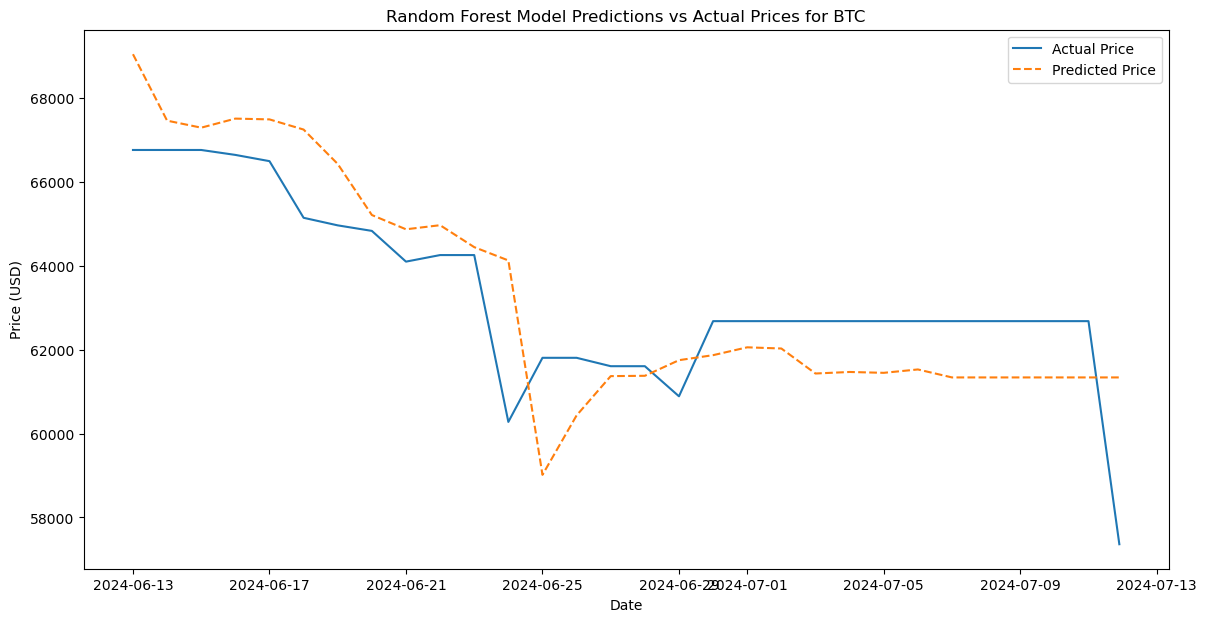

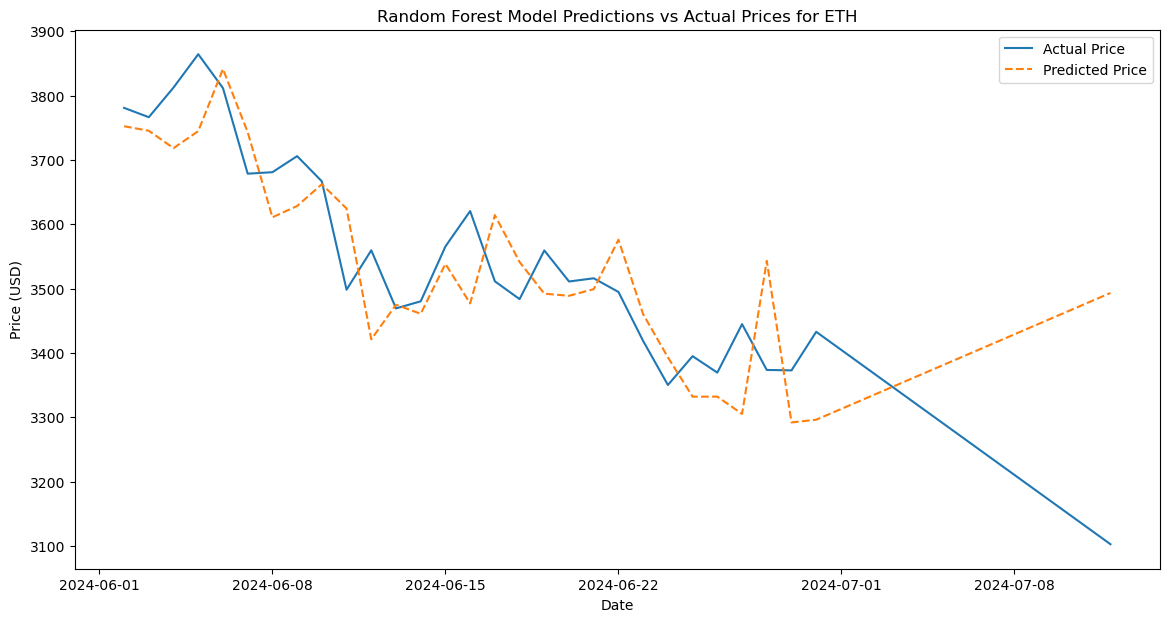

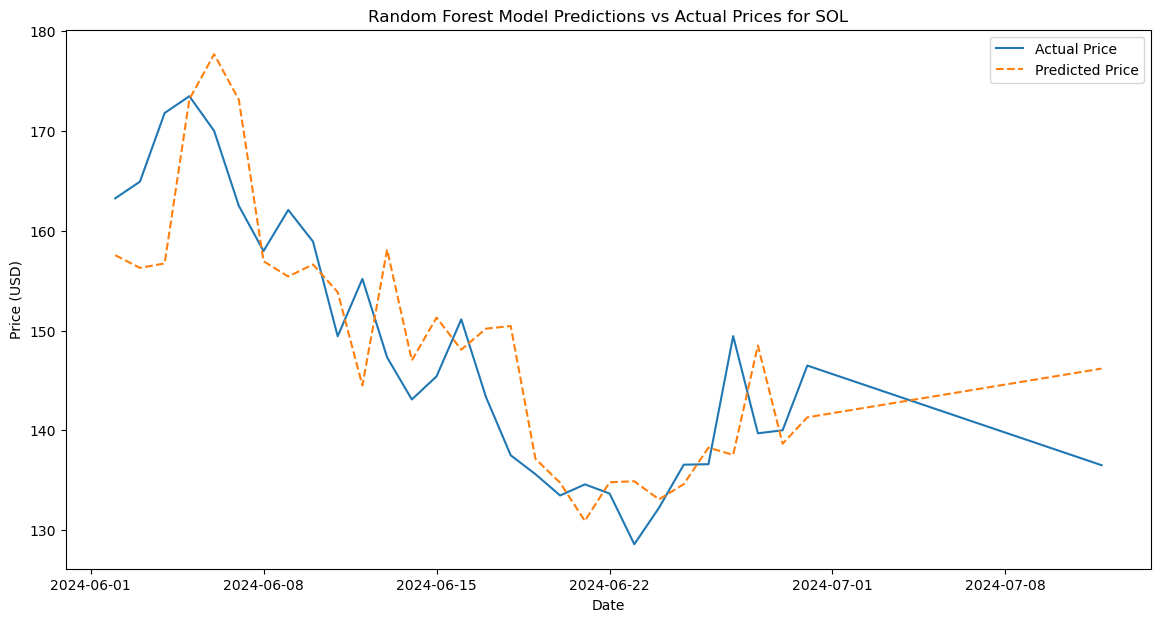

In [11]:
# Cell 8: Plot predictions vs actual prices
for crypto, predictions in crypto_predictions.items():
    results = crypto_X_test[crypto].copy()
    results['Predictions'] = predictions
    
    plt.figure(figsize=(14, 7))
    plt.plot(results.index, crypto_data[crypto]['Close'].tail(len(predictions)), label='Actual Price')
    plt.plot(results.index, results['Predictions'], label='Predicted Price', linestyle='--')
    plt.title(f'Random Forest Model Predictions vs Actual Prices for {crypto}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()
